In [ ]:
"""
Created on 20190213

Practice of PyTorch basics

Ref: https://fgc.stpi.narl.org.tw/activity/videoDetail/4b1141305d9cd231015d9d0992ef0030
"""


# Import

In [1]:
import torch
import numpy as np

# Basics Operations

## Create matrix

In [6]:
print(torch.ones(3, 5))
print(torch.zeros(3, 5))
print(torch.eye(4))
print(torch.rand(3, 5))  # random sample from [0, 1)
print(torch.randn(3, 5))  # from normal distribution

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
tensor([[0.4323, 0.0942, 0.1160, 0.3262, 0.9966],
        [0.5292, 0.0091, 0.6374, 0.6664, 0.0096],
        [0.1855, 0.5773, 0.9703, 0.2999, 0.5155]])
tensor([[ 0.9469,  0.8299,  0.5800,  0.5513,  1.8442],
        [-2.0218, -0.1729,  2.6649, -0.7844,  1.0886],
        [ 0.0938, -0.2456, -0.3907,  0.6719, -1.8747]])


## Matrix operation

In [10]:
m1 = torch.rand((3, 1))
m2 = torch.rand((3, 1))

print(torch.cat((m1, m2), 1).shape)  # 將m1和m2兩個矩陣在第一個維度合併起來
print(torch.stack((m1, m2), 1).shape)  # 將m1和m2兩個矩陣在新的維度（第一維）疊起來

print(m1.squeeze(1).shape)  # 如果m的第一維的長度是1，則合併這個維度，即(A, 1, B) -> (A, B)

print(m1.unsqueeze(1).shape)  # m的第一維多一個維度，即(A, B) -> (A, 1, B)

print(m1 + m2)  # 矩陣element-wise相加，其他基本運算是一樣的

torch.Size([3, 2])
torch.Size([3, 2, 1])
torch.Size([3])
torch.Size([3, 1, 1])
tensor([[1.0286],
        [1.0063],
        [0.6752]])


## Other important operation

In [22]:
m = torch.randint(10, (6, 5))
m2 = torch.rand((5, 1))
m3 = np.random.randint(10, size=(3, 3))

print(m.view(5, 3, -1).shape)  # 如果m的元素個數是15的倍數，回傳一個大小為(5, 3, ?)的
                               # tensor，問號會自動推算。tensor的資料是連動的。等同reshape
print(m2)
print(m2.expand(5, 3))  # 將m擴展到(5, 3)的大小，RepeatVector的感覺。

# m.cuda()            # 將m搬移到GPU來運算
# m.cpu()             # 將m搬移到CPU來運算

print(torch.from_numpy(m3)) # 回傳一個tensor，其資料和numpy變數是連動的。numpt2tensor
print(m2.numpy())           # 回傳一個numpy變數，其資料和tensor是連動的。tensor2numpy

torch.Size([5, 3, 2])
tensor([[0.0756],
        [0.4699],
        [0.0918],
        [0.7922],
        [0.9655]])
tensor([[0.0756, 0.0756, 0.0756],
        [0.4699, 0.4699, 0.4699],
        [0.0918, 0.0918, 0.0918],
        [0.7922, 0.7922, 0.7922],
        [0.9655, 0.9655, 0.9655]])
tensor([[0, 8, 8],
        [4, 1, 9],
        [5, 9, 2]])
[[0.07558203]
 [0.4698925 ]
 [0.09182632]
 [0.79217863]
 [0.96547   ]]


## Variable
一個Variable最重要的屬性（attribute）是data，它是一個Tensor物件，儲存這個變數現在的值。一個Variable的創建與使用方式長這個樣子：

In [4]:
import torch
from torch.autograd import Variable

m1 = torch.ones(5, 3)
m2 = torch.ones(5, 3)
a = Variable(m1)
b = Variable(m2)
c = a + b
print(a)
print(type(b))
print(type(c))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


- `如果把c（或c.data）印出來，你會發現他是一個元素都是2的5x3矩陣。`

`PyTorch做的非常好的一件事就是：幾乎所有前面介紹對Tensor的操作都可以用在Variable上！所以我們使用者只需要熟悉一種語法。然而，搭配前面對於有向圖的說明，大家必須了解到其背後所做的事情是不一樣的！Tensor的操作是單純的資料修改，沒有紀錄；而Variable的操作除了data的資料會有改動，所有的操作也會記錄下來變成一個有向圖，藉由creator這個屬性儲存起來。`

Variable還有兩個重要的屬性。

**requires_grad**指定要不要更新這個變數，對於不需要更新的變數可以把他設定成False，可以加快運算。

**volatile**指定需不需要保留紀錄用的變數。指定變數為True代表運算不需要記錄，可以加快運算。如果一個變數的volatile是True，則它的requires_grad一定是False。簡單來說，對於需要更新的Variable記得將requires_grad設成True，當只需要得到結果而不需要更新的Variable可以將volatile設成True加快運算速度。

## Autograd
    如同上面所說的，反向傳播是我們現在廣泛使用的更新模型方式。當我們定義了誤差如何計算的同時，其實也隱含定義了反向傳播的傳遞方向。這正是Autograd的運作原理：藉由前面所說的有向圖，PyTorch可以自動幫我們計算梯度。我們只要對於誤差的Variable物件呼叫backward函數，就可以把沿途所用到參數的gradient都計算出來，儲存在各個參數的grad屬性裡。最後，更新每個參數的data值。通常，我們使用優化器（optimizer）來更新它們。

    優化器的使用方法也非常簡單。首先在初始化優化器時提供被更新參數的清單。在每一次更新前，先呼叫優化器的zero_grad把上一次更新時用到的梯度歸零（這一步很容易忘記。如果沒有做，backward得到的梯度會被累加）。接著，呼叫backward將參數的grad算出來後，再呼叫step利用儲存的grad和data來計算新的data的值。

    就讓我們延續上面的範例來解釋使用原理。

In [7]:
import torch
from torch.autograd import Variable
from torch.optim import SGD

m1 = torch.ones(5, 3)
m2 = torch.ones(5, 3)

# 記得要將requires_grad設成True
a = Variable(m1, requires_grad=True)
b = Variable(m2, requires_grad=True)

# 初始化優化器，使用SGD這個更新方式來更新a和b
optimizer = SGD([a, b], lr=0.1)

for _ in range(10):        # 我們示範更新10次
    loss = (a + b).sum()   # 假設a + b就是我們的loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()       # 更新

print(a)
print(b)

tensor([[-7.4506e-08, -7.4506e-08, -7.4506e-08],
        [-7.4506e-08, -7.4506e-08, -7.4506e-08],
        [-7.4506e-08, -7.4506e-08, -7.4506e-08],
        [-7.4506e-08, -7.4506e-08, -7.4506e-08],
        [-7.4506e-08, -7.4506e-08, -7.4506e-08]], requires_grad=True)
tensor([[-7.4506e-08, -7.4506e-08, -7.4506e-08],
        [-7.4506e-08, -7.4506e-08, -7.4506e-08],
        [-7.4506e-08, -7.4506e-08, -7.4506e-08],
        [-7.4506e-08, -7.4506e-08, -7.4506e-08],
        [-7.4506e-08, -7.4506e-08, -7.4506e-08]], requires_grad=True)


    常用的優化器有非常多種：SGD、RMSprop、Adagrad、Adam等等，其中最基本的是SGD，代表Stochastic Gradient Descent。感謝PyTorch良好的架構，選擇不一樣的優化器不會對我們的模型有任何改變。事實上，我們只要將上面程式碼初始化優化器的SGD改變成其他優化器就可以了。不過，不同的優化器可能會因為不同的更新方式而造成最後得到的正確率不同，

    最後讓我們簡單重述更新的步驟：

    操作現有的參數與輸入的變數，得到預測。利用預測和正確答案定義我們的誤差。
    呼叫優化器的zero_grad將上次更新的梯度歸零。
    呼叫誤差的backward算出所有參數的梯度。
    呼叫優化器的step更新參數。
    從上面的例子可以看到，我們通常將這些步驟放在一個for迴圈裡，在訓練時更新數千萬次。

## Module
    Variable只不過是PyTorch裡建立模型的最小元件。深度學習的模型常常用一層一層的layer來作為變數操作的單位。Layer又是五花八門，常用的有Full-connected layer，Convolutional layer、Recurrent layer等等。每一種layer通常包含不只一個Variable的操作。Pytorch的模組可以把這些操作群組在一起。模組甚至可以包含其他模組，組成一個樹狀結構。如此一來，變數的建立與管理變得十分方便。事實上，我們通常把整個模型包裝成一個模組，這麼做尤其在儲存和載入模型的時候非常有用。

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)    # 註冊了conv1這個名字
        self.conv2 = nn.Conv2d(20, 20, 5)   # 註冊了conv2這個名字

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
# 會印出4個參數'conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias'的值
print(Model().parameters())  
for p in Model().parameters():
    print(p.shape) 
     # 20個Feature Map, 5x5 filters參數, 只有1個input channel
     # 20個Feature Map, 5x5 filters參數, input有20個input channels
    

torch.Size([20, 1, 5, 5])
torch.Size([20])
torch.Size([20, 20, 5, 5])
torch.Size([20])
<generator object Module.parameters at 0x7f91155f3410>


## More APIs

`https://pytorch.org/docs/stable/torch.html`

# Activation
`https://morvanzhou.github.io/tutorials/machine-learning/torch/2-03-activation/`

In [6]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [20]:
# fake data

x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy() # Variable.data -> tensor -> numpy

# 幾個常用的Activation function
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类
print(y_softplus)

[0.00671535 0.00706021 0.00742271 0.00780375 0.00820427 0.00862527
 0.00906776 0.00953285 0.01002167 0.01053544 0.01107538 0.01164285
 0.01223921 0.01286592 0.0135245  0.01421656 0.01494376 0.01570788
 0.01651074 0.01735429 0.01824053 0.01917161 0.02014974 0.02117724
 0.02225655 0.02339024 0.02458096 0.02583152 0.02714485 0.028524
 0.02997218 0.03149272 0.03308915 0.03476509 0.03652439 0.03837101
 0.04030914 0.04234309 0.04447743 0.04671685 0.04906628 0.05153086
 0.0541159  0.05682698 0.05966987 0.06265058 0.06577535 0.06905065
 0.07248322 0.07608002 0.07984827 0.08379547 0.08792935 0.09225792
 0.09678947 0.10153248 0.10649578 0.11168843 0.11711974 0.12279933
 0.12873702 0.13494292 0.14142737 0.14820093 0.15527444 0.1626589
 0.17036554 0.17840579 0.18679126 0.19553366 0.20464492 0.214137
 0.22402205 0.23431218 0.24501958 0.25615656 0.26773518 0.2797676
 0.29226586 0.30524188 0.3187074  0.33267394 0.34715295 0.3621552
 0.37769172 0.39377248 0.41040775 0.42760688 0.44537872 0.4637321
 0.

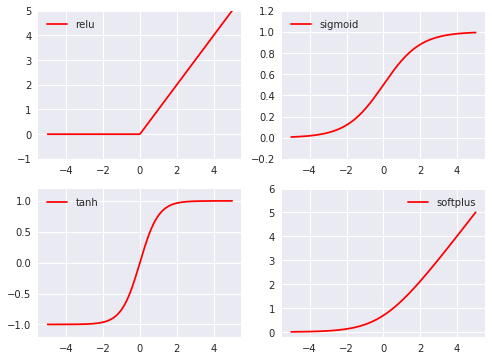

In [11]:
plt.style.use("seaborn")

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

# Loss Function

In [14]:
y1 = torch.FloatTensor([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
_, targets = y1.max(dim=0)
print(targets)

# loss_val = nn.CrossEntropyLoss()(out, y) -> 感覺是個__call__的class
# input是softmax,output是labrls(不用one-hot)
torch.nn.CrossEntropyLoss()(torch.FloatTensor([[1, 0, 0], [0, 0, 1], [1, 0, 0]]), 
                            targets) 

tensor([2, 0, 1])


tensor(1.5514)

In [13]:
print(torch.randn(3, 5, requires_grad=True))
print(torch.empty(3, dtype=torch.long).random_(5))

tensor([[-0.0772, -1.8505, -0.8207, -0.0742, -0.2334],
        [-1.2161,  1.7458, -0.5375,  0.8728,  0.7215],
        [ 0.0274,  0.5122, -1.4962, -1.1980,  0.1231]], requires_grad=True)
tensor([2, 4, 4])
